# Name- Yuvika Yadav

# Task-3 (From the given iris dataset predict the optimum number of clusters and represent it visually)


# We first import necesaary libraries

In [37]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt


# Exploring the dataset

In [38]:
df=pd.read_csv("Iris.csv")
df.shape

(150, 6)

It shows that our file is having 150 entries and 6 columns 

In [39]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [40]:
df.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [41]:
iris_df=df.drop(["Id","Species"],axis='columns')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Elbow plot to find optimum number of cluster

In [42]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    sse.append(km.inertia_)

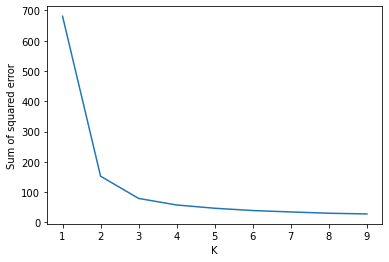

In [43]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

From the above plot it is quite clear that the optimum number of clusters would be 3

# Forming clusters

In [44]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(iris_df)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [47]:
iris_df["cluster"]=yp
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Clusters Visualisation

In [48]:
Df1 = iris_df[iris_df.cluster==0]
Df2 = iris_df[iris_df.cluster==1]
Df3 = iris_df[iris_df.cluster==2]
Df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
52,6.9,3.1,4.9,1.5,0
77,6.7,3.0,5.0,1.7,0
100,6.3,3.3,6.0,2.5,0
102,7.1,3.0,5.9,2.1,0
103,6.3,2.9,5.6,1.8,0


In [49]:
Df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [50]:
Df3.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
50,7.0,3.2,4.7,1.4,2
51,6.4,3.2,4.5,1.5,2
53,5.5,2.3,4.0,1.3,2
54,6.5,2.8,4.6,1.5,2
55,5.7,2.8,4.5,1.3,2


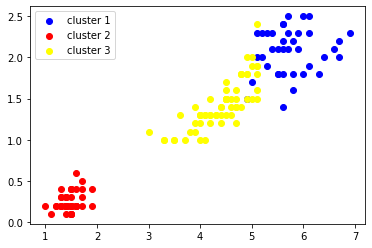

In [51]:
plt.scatter(Df1.PetalLengthCm,Df1.PetalWidthCm,color='blue',label="cluster 1")
plt.scatter(Df2.PetalLengthCm,Df2.PetalWidthCm,color='red',label="cluster 2")
plt.scatter(Df3.PetalLengthCm,Df3.PetalWidthCm,color='yellow',label="cluster 3")
plt.legend()
